In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Outline
- oulier analysis
- forecasting horizon explained
- time series cross validation
- lag features
- predicting future

In [4]:
df = pd.read_csv('datasets/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


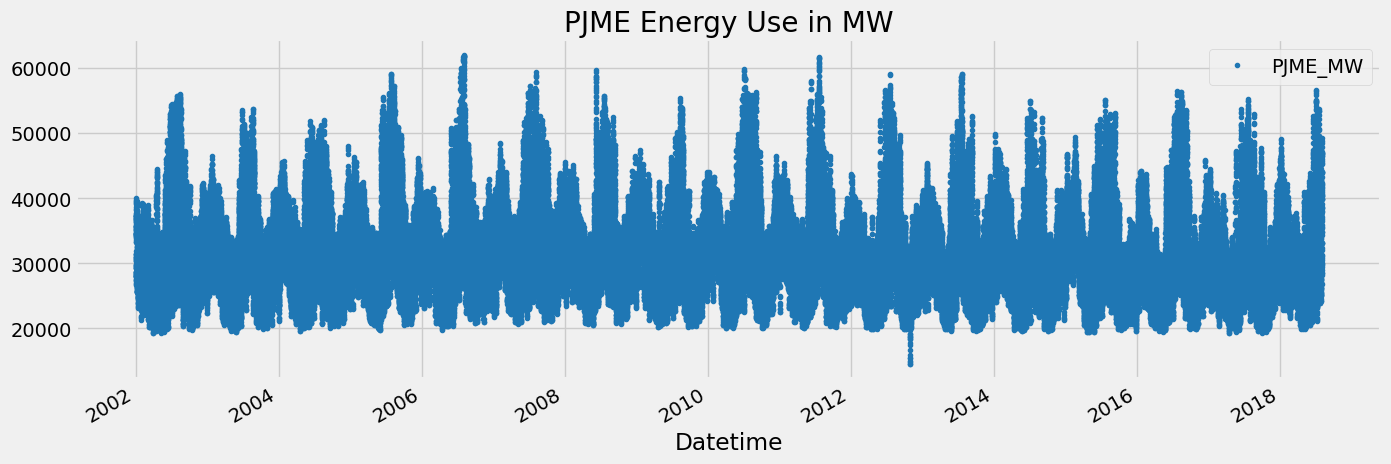

In [6]:
df.plot(style='.',
        figsize=(15,5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

- - 2012 values there's a low pick, might be unfaithful data/ blackout/ sensors error **outlier**

# 1. outlier Analysis and removal

<AxesSubplot:ylabel='Frequency'>

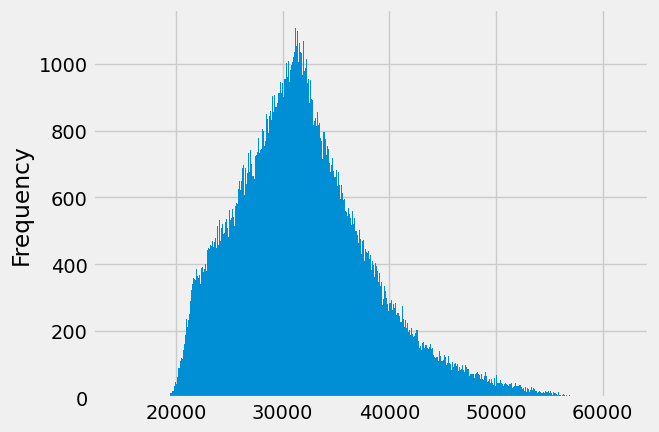

In [10]:
df['PJME_MW'].plot(kind='hist', bins=500)

<AxesSubplot:title={'center':'Outliers'}, xlabel='Datetime'>

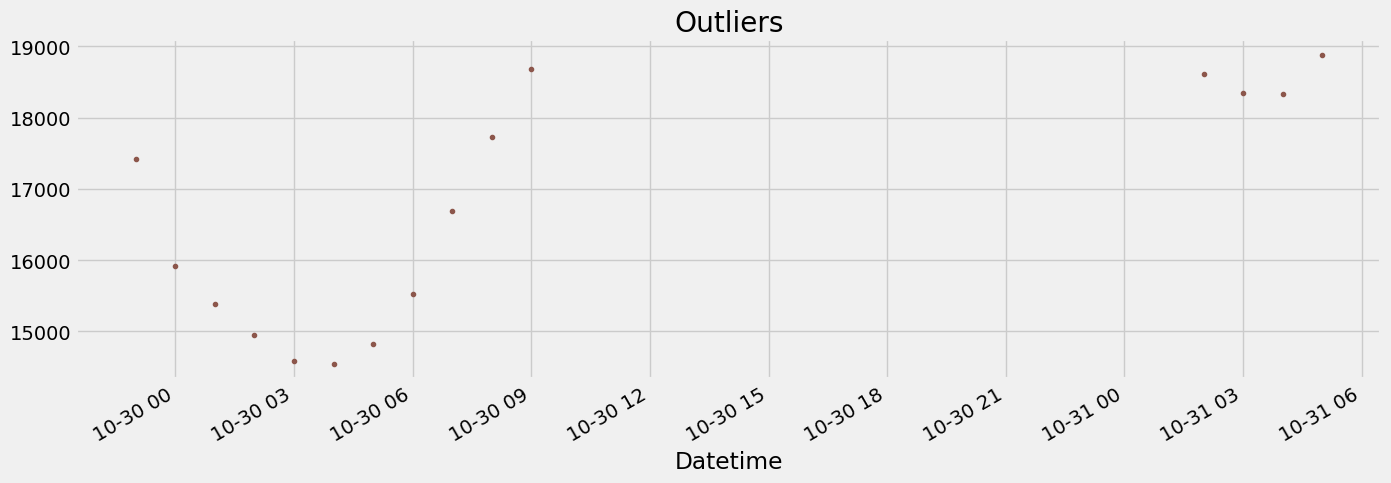

In [12]:
df.query('PJME_MW < 19_000')['PJME_MW'].plot(style='.', figsize=(15,5), color=color_pal[5], title='Outliers')

In [13]:
df = df.query('PJME_MW < 19_000').copy()

# 2. Time Series Cross Validation

In [14]:
from sklearn.model_selection import TimeSeriesSplit

In [16]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1 ,gap=24 )#24h,a year, 1year      #btw train/test     #tss(only a generator)
df = df.sort_index() # if not tss will not work

ValueError: Too many splits=5 for number of samples=15 with test_size=8760 and gap=24.

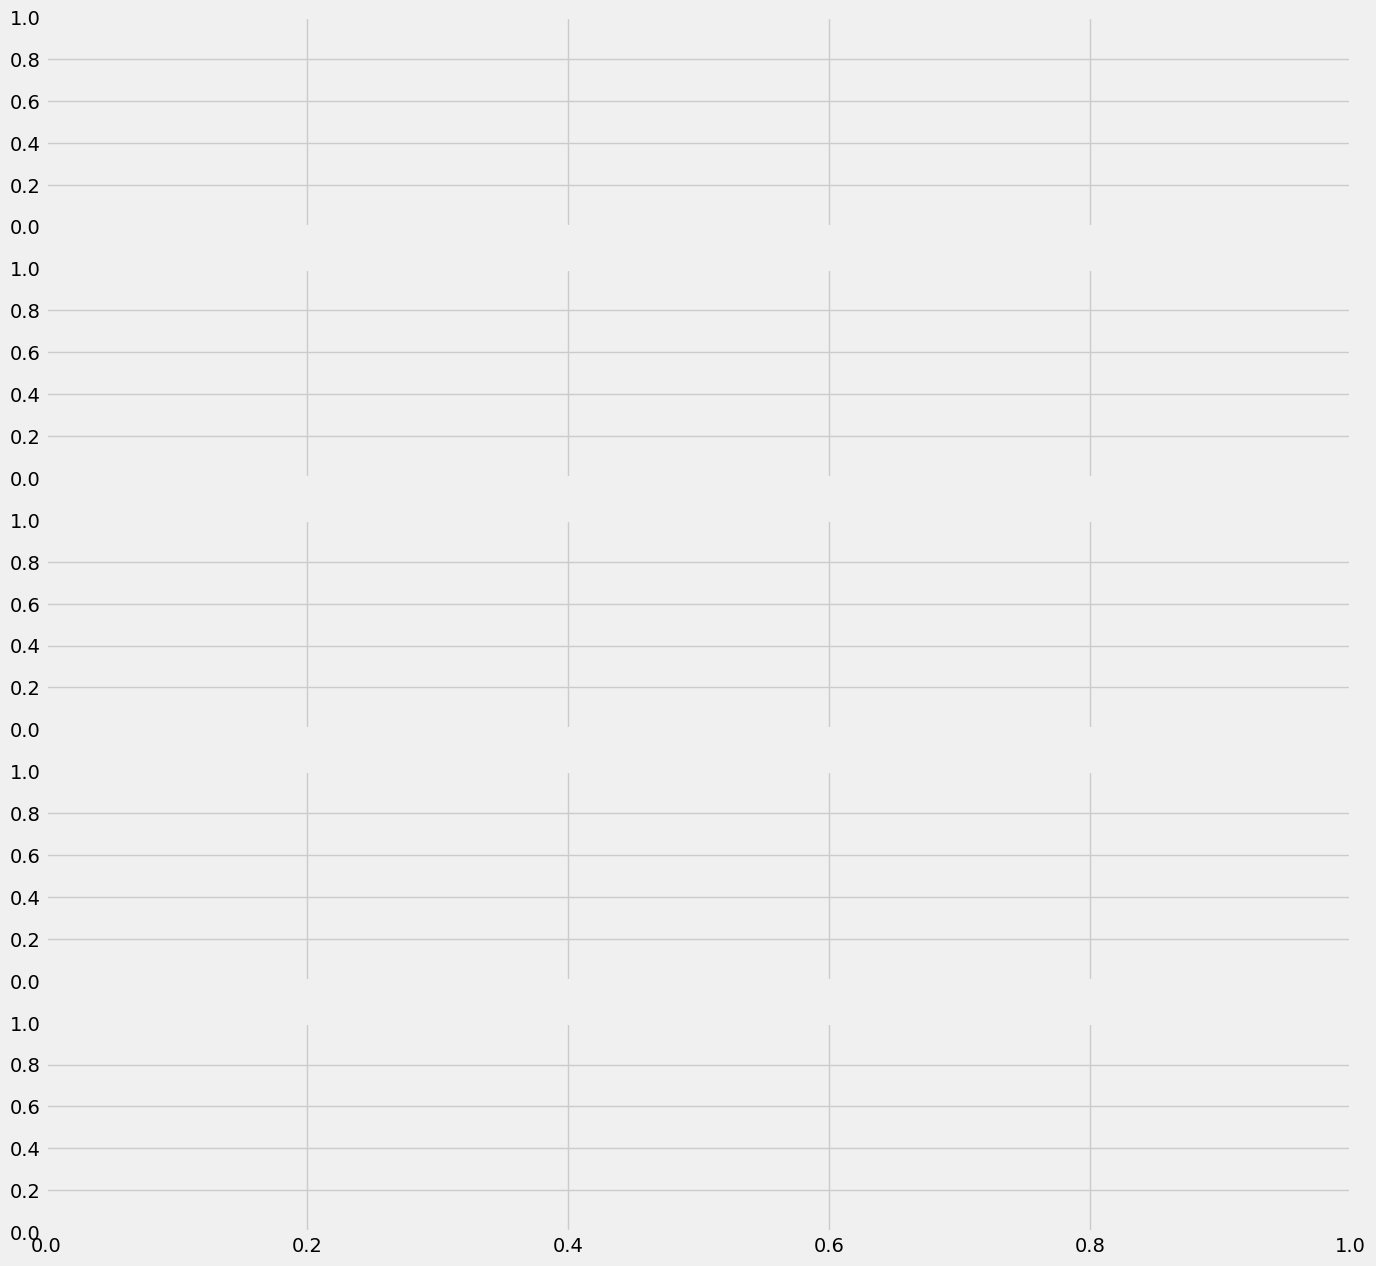

In [25]:
# plot it so it's easy to understand
fig, axs = plt.subplots(5, 1, figsize=(15,15), sharex=True)

# track fold
fold= 0 
for train_idx, val_idx in tss.split(df):
    train = df.loc[train_idx]
    test = df.loc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                          label = 'Training Set',
                          title = f'Data Train/ Test Split Fold {fold}')
    test['PJME_MW'].plot(ax=axs[fold],
                          label = 'Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [ ]:
#